In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score

# Read the dataset
df_cars = pd.read_csv('./final_dataset.csv', sep=',', decimal='.')

# How many colums are nan?
num_cols = df_cars.isnull().sum()
print(num_cols)

# Drop the columns with nan values
df_cars = df_cars.dropna(axis=0)


uuid                                0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


      Fuel Consumption City (L/100 km)  CO2 Emissions(g/km)
0                             1.212406             1.476965
1                             0.526699             0.400202
2                            -0.016152             0.109647
3                             1.040979             1.476965
4                            -0.444719            -0.351823
...                                ...                  ...
7380                         -0.501861            -0.591103
7381                          1.755258             2.211898
7382                         -0.701859            -0.625286
7383                          0.069561             0.178013
7384                         -1.016142            -1.001299

[7385 rows x 2 columns]
      Fuel Consumption City (L/100 km)  CO2 Emissions(g/km)
0                             0.477273             0.565728
1                             0.386364             0.417840
2                             0.314394             0.377934
3              

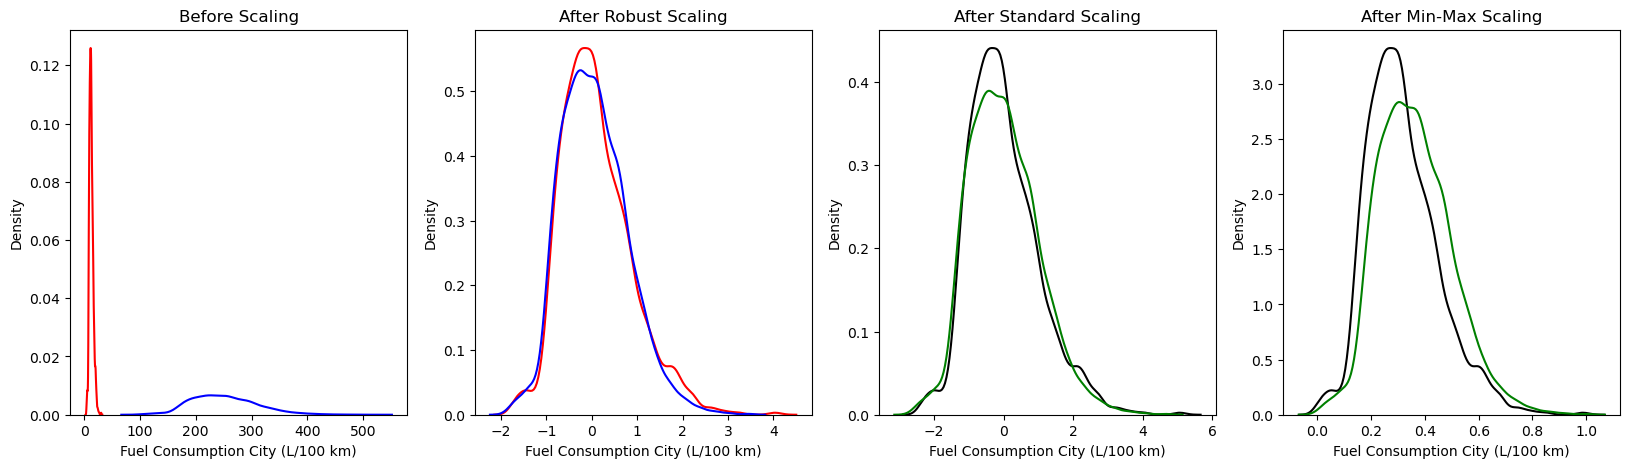

In [3]:
# -----------------------------
# scale the dataset
# -----------------------------
#
# When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?
# The answer to this problem is scaling. We can scale data into new values that are easier to compare.

data = df_cars[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]
fuel_consumption = 'Fuel Consumption City (L/100 km)'
co2_emissions = 'CO2 Emissions(g/km)'

# Standard deviation
# StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
standard_scale = StandardScaler()

x_standard_scale = standard_scale.fit_transform(data)
x_standard_scale = pd.DataFrame(x_standard_scale, columns = [fuel_consumption, co2_emissions])

print(x_standard_scale)

# Min Max Scaler
# MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset
min_max_scale = MinMaxScaler()

x_min_max_scale = min_max_scale.fit_transform(data)
x_min_max_scale = pd.DataFrame(x_min_max_scale, columns = [fuel_consumption, co2_emissions])

print(x_min_max_scale)

# Robust Scaler
# RobustScaler scales the data to median and quantiles. Therefore, the outliers are not affected by the scaling.
robust_scale = RobustScaler()

x_robust_scale = robust_scale.fit_transform(data)
x_robust_scale = pd.DataFrame(x_robust_scale, columns = [fuel_consumption, co2_emissions])

print(x_robust_scale)

# -----------------------------
# plot the dataset to show the scaling
# -----------------------------

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_cars[fuel_consumption], ax = ax1, color ='r')
sns.kdeplot(df_cars[co2_emissions], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')  
sns.kdeplot(x_robust_scale[fuel_consumption], ax = ax2, color ='red')
sns.kdeplot(x_robust_scale[co2_emissions], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(x_standard_scale[fuel_consumption], ax = ax3, color ='black')
sns.kdeplot(x_standard_scale[co2_emissions], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(x_min_max_scale[fuel_consumption], ax = ax4, color ='black')
sns.kdeplot(x_min_max_scale[co2_emissions], ax = ax4, color ='g')
plt.show()



In [65]:
# -----------------------------
# Hyperparameters
# -----------------------------

# Hyperparameters in Machine learning are those parameters that are explicitly defined by the user to control the learning process.
# example: learning rate


# -----------------------------
# Linear regression
# -----------------------------

# Can the input data be changed to a scaled dataset for better performance?

X = np.array(x_robust_scale[fuel_consumption]).reshape(-1, 1)
y = np.array(x_robust_scale[co2_emissions]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test, y_test, color ='b')
ax.plot(X_test, y_pred, color ='k')
ax.set_xlabel(fuel_consumption)
ax.set_ylabel(co2_emissions)
plt.show()

# Metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

ValueError: cannot reshape array of size 7385 into shape (0,0)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

# -----------------------------
# Random forest
# -----------------------------

# Random forest is a supervised learning algorithm. It can be used both for classification and regression problems. However, it is mostly used for classification problems.

X_train, X_test, y_train, y_test = train_test_split( df_cars[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']], df_cars[co2_emissions], test_size = 0.30)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

# explore what features the model ‘thinks’ are most important in determining the co2 emission
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

ACCURACY OF THE MODEL:  0.5392599277978339


,0
Fuel Consumption Hwy (L/100 km),0.256165
Fuel Consumption City (L/100 km),0.240997
Fuel Consumption Comb (L/100 km),0.209708
Engine Size(L),0.188547
Fuel Consumption Comb (mpg),0.068847
Cylinders,0.035736


In [28]:
## Could be a solution but needed a long time…

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}


rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/richardmenning/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=  15.9s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=  16.6s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=  16.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1135; total time=  17.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1135; total time=  17.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=1135; total time=  17.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=307; total time=   4.9s
[CV] END bootstrap=True, criterion=entropy, max_de

/Users/richardmenning/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, criterion=gini, max_depth=200, min_samples_leaf=4, min_samples_split=10, n_estimators=928; total time=  14.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=3, min_samples_split=15, n_estimators=928; total time=  13.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=3, min_samples_split=15, n_estimators=928; total time=  13.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=307; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=307; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=1, n_estimators=2792; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=1, n_estimators=2792; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, ma

KeyboardInterrupt: 